In [1]:
from selenium import webdriver
from konlpy.tag import Okt
from nltk import Text
from matplotlib import font_manager, rc
from wordcloud import WordCloud
 
import matplotlib.pyplot as plt
import time
 
path = "c:/rpy/chromedriver.exe" # 웹드라이버 실행

C:\Users\korea\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\korea\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\korea\anaconda3\lib\site-packages\numpy\.libs\libopenblas.gk7gx5keq4f6uyo3p26ulgbqyhgqo7j4.gfortran-win_amd64.dll
C:\Users\korea\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [7]:
driver = webdriver.Chrome(path) # 드라이버 경로 설정
url_list = [] # 블로그 url을 저장하기 위한 변수
content_list = "" # 블로그 content를 누적하기 위한 변수
text = "서울식물원" # 검색어
 
for i in range(1, 100):  # 1~2페이지까지의 블로그 내용을 읽어옴
    url = 'https://section.blog.naver.com/Search/Post.nhn?pageNo='+ str(i) + '&rangeType=ALL&orderBy=sim&keyword=' + text # url 값 설정
    driver.get(url)
    time.sleep(0.5) # 오류 방지 sleep
 
    for j in range(1, 3):
        titles = driver.find_element_by_xpath('/html/body/ui-view/div/main/div/div/section/div[2]/div['+str(j)+']/div/div[1]/div[1]/a[1]')
        title = titles.get_attribute('href')
        url_list.append(title)
 
print("url 수집 끝, 해당 url 데이터 크롤링")

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_564/3825227216.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path) # 드라이버 경로 설정
C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_564/3825227216.py:12: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  titles = driver.find_element_by_xpath('/html/body/ui-view/div/main/div/div/section/div[2]/div['+str(j)+']/div/div[1]/div[1]/a[1]')


url 수집 끝, 해당 url 데이터 크롤링


In [9]:
url_list

['https://blog.naver.com/kimnok04/222771539889',
 'https://blog.naver.com/boring_29/222857025115',
 'https://blog.naver.com/naokyai/222754669763',
 'https://blog.naver.com/hgbtt/222771890721',
 'https://blog.naver.com/amint02/222844733402',
 'https://blog.naver.com/im_lsj/222850210794',
 'https://blog.naver.com/khskhj503/222671627116',
 'https://blog.naver.com/fjqmrlaals/222796352616',
 'https://blog.naver.com/mushsonge/222779591129',
 'https://blog.naver.com/tooblond/222761281857',
 'https://blog.naver.com/smartcar/222677026323',
 'https://blog.naver.com/beststars/222805805697',
 'https://blog.naver.com/scpark1214/222765611507',
 'https://blog.naver.com/soojoo01/222819459587',
 'https://blog.naver.com/bonocu/222835737630',
 'https://blog.naver.com/mina0823/222825035330',
 'https://blog.naver.com/cheekyhodori/222845100073',
 'https://blog.naver.com/joo1609/222837964507',
 'https://blog.naver.com/kcw5172/222772809499',
 'https://blog.naver.com/sunglys/222764069538',
 'https://blog.naver

In [ ]:
for url in url_list: # 저장했던 블로그 하나씩 순회
    driver.get(url)
 
    driver.switch_to.frame('mainFrame')
    overlays = ".se-component.se-text.se-l-default" # 내용 크롤링
    contents = driver.find_elements_by_css_selector(overlays)
 
    for content in contents:
        content_list = content_list + content.text # 각 블로그의 내용을 변수에 누적함

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_564/939933596.py:6: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  contents = driver.find_elements_by_css_selector(overlays)


In [3]:
for url in url_list: # 저장했던 블로그 하나씩 순회
    driver.get(url)
 
    driver.switch_to.frame('mainFrame')
    overlays = ".se-component.se-text.se-l-default" # 내용 크롤링
    contents = driver.find_elements_by_css_selector(overlays)
 
    for content in contents:
        content_list = content_list + content.text # 각 블로그의 내용을 변수에 누적함
 
# 트위터에서 만든 소셜 분석을 위한 형태소 분석기 Okt 사용
okt = Okt()
myList = okt.pos(content_list, norm=True, stem=True) # 모든 형태소 추출
myList_filter = [x for x, y in myList if y in ['Verb']] # 추출된 값 중 동사만 추출
 
Okt = Text(myList_filter, name="Okt")

WebDriverException: Message: chrome not reachable
  (Session info: chrome=104.0.5112.102)
Stacktrace:
Backtrace:
	Ordinal0 [0x007D78B3+2193587]
	Ordinal0 [0x00770681+1771137]
	Ordinal0 [0x00684070+802928]
	Ordinal0 [0x00679AB2+760498]
	Ordinal0 [0x0066CEAF+708271]
	Ordinal0 [0x00671142+725314]
	Ordinal0 [0x006755C9+742857]
	Ordinal0 [0x00685500+808192]
	Ordinal0 [0x006DD2C2+1168066]
	Ordinal0 [0x006CD5C6+1103302]
	Ordinal0 [0x006A77E0+948192]
	Ordinal0 [0x006A86E6+952038]
	GetHandleVerifier [0x00A80CB2+2738370]
	GetHandleVerifier [0x00A721B8+2678216]
	GetHandleVerifier [0x008617AA+512954]
	GetHandleVerifier [0x00860856+509030]
	Ordinal0 [0x0077743B+1799227]
	Ordinal0 [0x0077BB68+1817448]
	Ordinal0 [0x0077BC55+1817685]
	Ordinal0 [0x00785230+1856048]
	BaseThreadInitThunk [0x771EFA29+25]
	RtlGetAppContainerNamedObjectPath [0x778D7A9E+286]
	RtlGetAppContainerNamedObjectPath [0x778D7A6E+238]


Text(0, 0.5, '빈도')

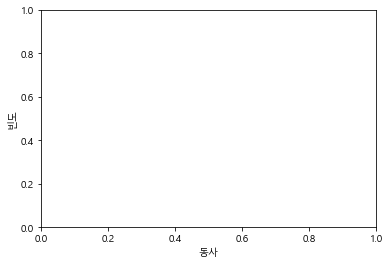

In [8]:
# 그래프에서 한글이 출력이 안되는 문제 해결 (ㅁㅁㅁ 처럼 출력됨)
font_location = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)
 
# 그래프 x, y 라벨 설정
plt.xlabel("동사")
plt.ylabel("빈도")

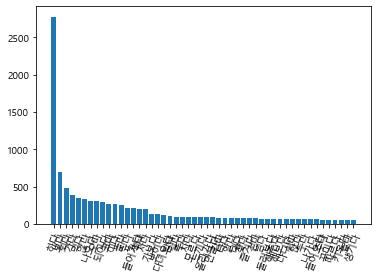

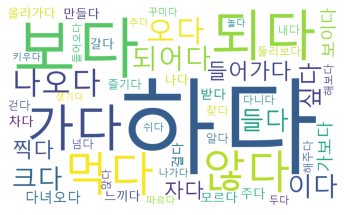

In [5]:
# 그래프에서 x, y 값을 설정
wordInfo = dict()
for tags, counts in Okt.vocab().most_common(50):
    if(len(str(tags)) > 1):
        wordInfo[tags] = counts
 
values = sorted(wordInfo.values(), reverse=True)
keys = sorted(wordInfo, key=wordInfo.get, reverse=True)
 
# 그래프 값 설정
plt.bar(range(len(wordInfo)), values, align='center')
plt.xticks(range(len(wordInfo)), list(keys), rotation='70')
plt.show()
 
 
# wordCloud 출력
wc = WordCloud(width = 1000, height = 600, background_color="white", font_path=font_location, max_words=50)
plt.imshow(wc.generate_from_frequencies(Okt.vocab()))
plt.axis("off")
plt.show()

In [5]:
from selenium import webdriver
from konlpy.tag import Okt
from nltk import Text
from matplotlib import font_manager, rc
from wordcloud import WordCloud
 
import matplotlib.pyplot as plt
import time
 
path = "c:/R/chromedriver.exe" # 웹드라이버 실행

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_992\1793661596.py:12: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path) # 드라이버 경로 설정
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_992\1793661596.py:23: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  titles = driver.find_element_by_xpath('/html/body/ui-view/div/main/div/div/section/div[2]/div['+str(j)+']/div/div[1]/div[1]/a[1]')


url 수집 끝, 해당 url 데이터 크롤링


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_992\1793661596.py:34: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  contents = driver.find_elements_by_css_selector(overlays)


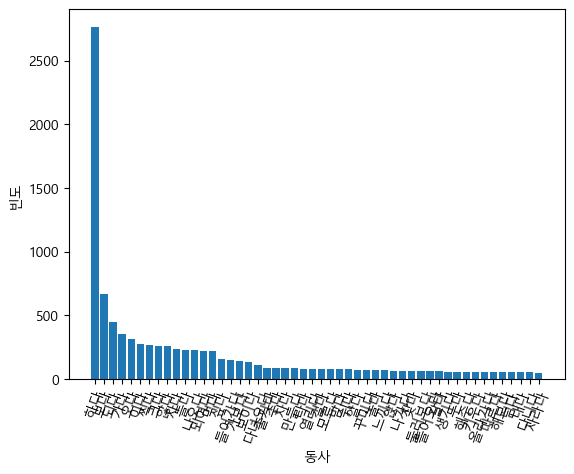

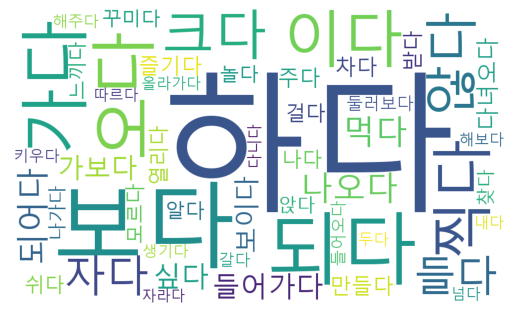

In [6]:
from selenium import webdriver
from konlpy.tag import Okt
from nltk import Text
from matplotlib import font_manager, rc
from wordcloud import WordCloud
 
import matplotlib.pyplot as plt
import time
 
path = "c:/R/chromedriver.exe" # 웹드라이버 실행
 
driver = webdriver.Chrome(path) # 드라이버 경로 설정
url_list = [] # 블로그 url을 저장하기 위한 변수
content_list = "" # 블로그 content를 누적하기 위한 변수
text = "서울식물원" # 검색어
 
for i in range(1, 100):  # 1~2페이지까지의 블로그 내용을 읽어옴
    url = 'https://section.blog.naver.com/Search/Post.nhn?pageNo='+ str(i) + '&rangeType=ALL&orderBy=sim&keyword=' + text # url 값 설정
    driver.get(url)
    time.sleep(0.5) # 오류 방지 sleep
 
    for j in range(1, 3):
        titles = driver.find_element_by_xpath('/html/body/ui-view/div/main/div/div/section/div[2]/div['+str(j)+']/div/div[1]/div[1]/a[1]')
        title = titles.get_attribute('href')
        url_list.append(title)
 
print("url 수집 끝, 해당 url 데이터 크롤링")
 
for url in url_list: # 저장했던 블로그 하나씩 순회
    driver.get(url)
 
    driver.switch_to.frame('mainFrame')
    overlays = ".se-component.se-text.se-l-default" # 내용 크롤링
    contents = driver.find_elements_by_css_selector(overlays)
 
    for content in contents:
        content_list = content_list + content.text # 각 블로그의 내용을 변수에 누적함
 
# 트위터에서 만든 소셜 분석을 위한 형태소 분석기 Okt 사용
okt = Okt()
myList = okt.pos(content_list, norm=True, stem=True) # 모든 형태소 추출
myList_filter = [x for x, y in myList if y in ['Verb']] # 추출된 값 중 동사만 추출
 
Okt = Text(myList_filter, name="Okt")
 
# 그래프에서 한글이 출력이 안되는 문제 해결 (ㅁㅁㅁ 처럼 출력됨)
font_location = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)
 
# 그래프 x, y 라벨 설정
plt.xlabel("동사")
plt.ylabel("빈도")
 
# 그래프에서 x, y 값을 설정
wordInfo = dict()
for tags, counts in Okt.vocab().most_common(50):
    if(len(str(tags)) > 1):
        wordInfo[tags] = counts
 
values = sorted(wordInfo.values(), reverse=True)
keys = sorted(wordInfo, key=wordInfo.get, reverse=True)
 
# 그래프 값 설정
plt.bar(range(len(wordInfo)), values, align='center')
plt.xticks(range(len(wordInfo)), list(keys), rotation='70')
plt.show()
 
 
# wordCloud 출력
wc = WordCloud(width = 1000, height = 600, background_color="white", font_path=font_location, max_words=50)
plt.imshow(wc.generate_from_frequencies(Okt.vocab()))
plt.axis("off")
plt.show()

In [8]:
pip install wordcloud


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip
